In [3]:
import pandas as pd

df = pd.read_csv(r"C:\heart_statlog_cleveland_hungary_final.csv")
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


<Axes: >

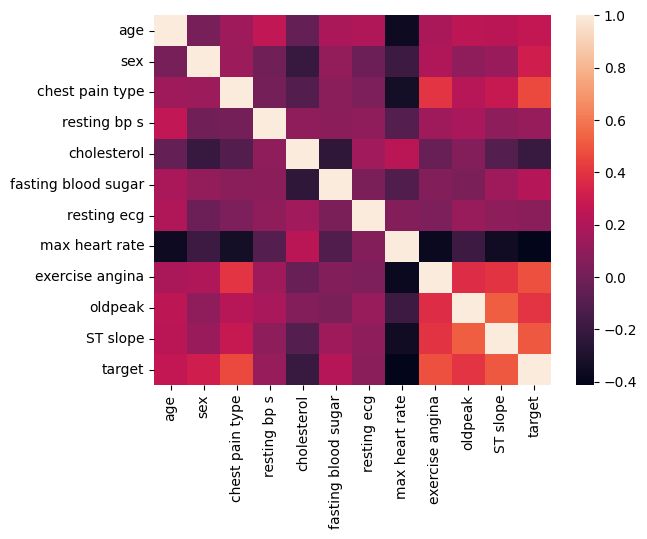

In [4]:
import seaborn as sns

sns.heatmap(df.corr())

In [52]:
df_train = df.iloc[:600]
df_test = df.iloc[600:]
df_test


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
600,56,1,4,130,203,1,0,98,0,1.50,2,1
601,57,1,4,130,207,0,1,96,1,1.00,2,0
602,61,1,3,140,284,0,0,123,1,1.30,2,1
603,61,1,3,120,337,0,0,98,1,0.00,2,1
604,58,1,3,150,219,0,1,118,1,0.00,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.20,2,1
1186,68,1,4,144,193,1,0,141,0,3.40,2,1
1187,57,1,4,130,131,0,0,115,1,1.20,2,1
1188,57,0,2,130,236,0,2,174,0,0.00,2,1


In [159]:
feature = [ "sex", "age", "chest pain type", "exercise angina", "oldpeak", "ST slope"]

X_Train = df_train[feature]
y_Train = df_train["target"]
X_Test = df_test[feature]
X_actual = df_test["target"]
X_Train

,sex,age,chest pain type,exercise angina,oldpeak,ST slope
0,1,40,2,0,0.00,1
1,0,49,3,0,1.00,2
2,1,37,2,0,0.00,1
3,0,48,4,1,1.50,2
4,1,54,3,0,0.00,1
...,...,...,...,...,...,...
595,1,58,4,1,1.00,1
596,1,60,4,1,0.50,2
597,1,57,4,0,0.00,2
598,1,55,3,0,0.20,1


In [160]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


model = GaussianNB()
model.fit(X_Train, y_Train)

GaussianNB()

In [162]:
acc_train = model.score(X_Train, y_Train)
acc_test = model.score(X_Test, model.predict(X_Test))
print(acc_train, acc_test)

0.8733333333333333 1.0


In [163]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

model2 = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = model2.fit(X_Train, X_Test, y_Train, X_actual)
models

100%|██████████| 29/29 [00:01<00:00, 28.43it/s]

[LightGBM] [Info] Number of positive: 358, number of negative: 242
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.596667 -> initscore=0.391595
[LightGBM] [Info] Start training from score 0.391595
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.80,0.80,0.80,0.80,0.01
NearestCentroid,0.78,0.78,0.78,0.78,0.01
AdaBoostClassifier,0.77,0.77,0.77,0.77,0.12
RidgeClassifierCV,0.77,0.77,0.77,0.77,0.02
BernoulliNB,0.77,0.77,0.77,0.77,0.01
RidgeClassifier,0.77,0.77,0.77,0.77,0.01
LinearDiscriminantAnalysis,0.77,0.77,0.77,0.77,0.01
LogisticRegression,0.76,0.76,0.76,0.76,0.01
LinearSVC,0.75,0.75,0.75,0.75,0.02


In [157]:
y_test = model.predict(X_Test)

y_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [158]:
from sklearn.metrics import classification_report

print(classification_report(X_actual, y_test))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       319
           1       0.70      0.82      0.76       271

    accuracy                           0.76       590
   macro avg       0.76      0.76      0.76       590
weighted avg       0.77      0.76      0.76       590

